Melakukan import libraries yang dibutukan

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
data=pd.read_excel('D:/Skripsi/Data/english_sentiment_clean_2polarity.xlsx')
del data['Unnamed: 0']
data

,created at,username,text,english,sentiment,preprocessed
0,2022-11-02,rudiartraa,"yaah , udah selesai nih Bjorka Bjorkaan nya ?","Yeah, have you finished Bjorka Bjorkaan?",Positive,selesai nih bjorka bjorkaan
1,2022-11-02,oi_filix315,"Kadang gua mikir sekilas pp gua mirip bjorka, ...",Sometimes I think my pp at a glance is like Bj...,Positive,kadang gue pikir kilas pp gue bjorka gue pakai pp
2,2022-11-01,falahsanjaya_,Knp ga ada yg jadi Bjorka Halloween party kema...,Why didn't anyone become a Bjorka Halloween Pa...,Positive,bjorka halloween pay kemarin
3,2022-11-01,namanyaajess,"Beritanya taik, mau ferdi sambo, mau bjorka, m...","The news is not, want Ferdy Sambo, want Bjorka...",Negative,berita tai ferdi sambo bjorka lapar tren topik...
4,2022-11-01,namakubaim,Apa kabar Bjorka?,How are Bjorka?,Positive,kabar bjorka
...,...,...,...,...,...,...
19995,2022-09-11,SecretAdmirerOP,hari ini ada 2 hari bersejarah\n9/11\nbjorka s...,Today there are 2 historic days \n 9/11 \n Bjo...,Negative,sejarah bjorka spill data bunuh munir tau
19996,2022-09-11,yonforger,"lah anjir aku baru tau bjorka tu hacker, kirai...","I just found out bjorka tu hacker, I think bur...",Positive,anjir tau bjorka hacker bubur kacang ijo tukan...
19997,2022-09-11,semangkalucu,kata w mending bjorka ngewarin tiket the link aja,said wa pending bjorka released the link the link,Positive,gue mending bjorka ngewarin tiket the link
19998,2022-09-11,choaciao,Bang bjorka bisa ga si hek hati doi biar sama ...,Bang bjorka can not hek heart,Negative,bang bjorka sih hek hati biar ghuweh


In [3]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,selesai nih bjorka bjorkaan,Positive
1,kadang gue pikir kilas pp gue bjorka gue pakai pp,Positive
2,bjorka halloween pay kemarin,Positive
3,berita tai ferdi sambo bjorka lapar tren topik...,Negative
4,kabar bjorka,Positive
...,...,...
19995,sejarah bjorka spill data bunuh munir tau,Negative
19996,anjir tau bjorka hacker bubur kacang ijo tukan...,Positive
19997,gue mending bjorka ngewarin tiket the link,Positive
19998,bang bjorka sih hek hati biar ghuweh,Negative


In [4]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18156\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,selesai nih bjorka bjorkaan,0
1,kadang gue pikir kilas pp gue bjorka gue pakai pp,0
2,bjorka halloween pay kemarin,0
3,berita tai ferdi sambo bjorka lapar tren topik...,1
4,kabar bjorka,0
...,...,...
19995,sejarah bjorka spill data bunuh munir tau,1
19996,anjir tau bjorka hacker bubur kacang ijo tukan...,0
19997,gue mending bjorka ngewarin tiket the link,0
19998,bang bjorka sih hek hati biar ghuweh,1


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
vocab_size=17586
max_len=100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [7]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 100), (4000, 100), (16000,), (4000,))

In [ ]:
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#x_train, y_train = oversample.fit_resample(x_train, y_train)
#x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [9]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 100), (4000, 100), (16000, 3), (4000, 3))

In [12]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(vocab_size, 100, input_length=max_len),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1758600   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1000100   
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 2,759,003
Trainable params: 2,759,003
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [111]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',f1_m])

In [112]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
400/400 [==============================] - 6s 10ms/step - loss: 0.5125 - accuracy: 0.7577 - f1_m: 0.2663 - val_loss: 0.4739 - val_accuracy: 0.7800 - val_f1_m: 0.4332
Epoch 2/20
400/400 [==============================] - 4s 9ms/step - loss: 0.2946 - accuracy: 0.8798 - f1_m: 0.7422 - val_loss: 0.5245 - val_accuracy: 0.7803 - val_f1_m: 0.5211
Epoch 3/20
400/400 [==============================] - 3s 7ms/step - loss: 0.1284 - accuracy: 0.9545 - f1_m: 0.9089 - val_loss: 0.6889 - val_accuracy: 0.7631 - val_f1_m: 0.5601
Epoch 4/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0720 - accuracy: 0.9762 - f1_m: 0.9526 - val_loss: 0.8222 - val_accuracy: 0.7747 - val_f1_m: 0.4913
Epoch 5/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0519 - accuracy: 0.9819 - f1_m: 0.9629 - val_loss: 0.9066 - val_accuracy: 0.7631 - val_f1_m: 0.5052
Epoch 6/20
400/400 [==============================] - 3s 6ms/step - loss: 0.0409 - accuracy: 0.9852 - f1_m: 0.9700 - va

In [113]:
model.evaluate(x_test,y_test)

125/125 [==============================] - 1s 6ms/step - loss: 1.5166 - accuracy: 0.7538 - f1_m: 0.4933


[1.5165921449661255, 0.7537500262260437, 0.4933173358440399]

In [99]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

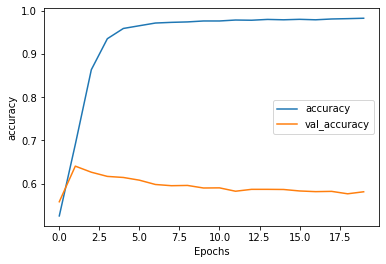

In [100]:
plot_graphs(history=history,metric='accuracy')

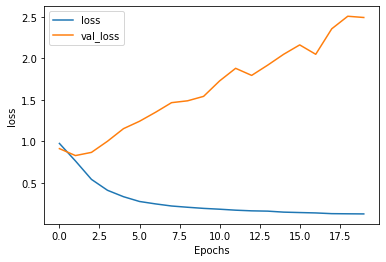

In [85]:
plot_graphs(history=history,metric='loss')

In [23]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=3, batch_input_shape=(None,250,100), return_sequences=True))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 250, 3)            1248      
                                                                 
Total params: 1,248
Trainable params: 1,248
Non-trainable params: 0
_________________________________________________________________
